In [50]:
import tensorflow as tf
import pandas as pd


In [48]:
from tensorflow.python.client import device_lib
print(f"Running TensorFlow {tf.__version__} with {len(tf.config.list_physical_devices('GPU'))} GPUs recognized")
device_lib.list_local_devices()

Running TensorFlow 2.5.0 with 1 GPUs recognized


2021-10-26 18:42:55.102335: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-26 18:42:55.102487: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9166570902534058892,
 name: "/device:GPU:0"
 device_type: "GPU"
 locality {
   bus_id: 1
 }
 incarnation: 10219935693479439099
 physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"]

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import sys, os

       0
0      0
1      1
2      1
3      0
4      1
...   ..
10310  1
10311  0
10312  0
10313  1
10314  0

[10315 rows x 1 columns]


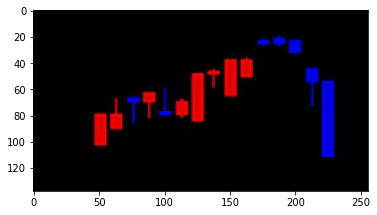

(10315, 138, 256, 3)
(10315,)
(8252, 138, 256, 3)   (8252,)


In [18]:

# Data load

sys.setrecursionlimit(100000)

lable_path = "/Users/ubinyou/Documents/Task/Upbit-MachineLearning-AutomaticProgram/data/minute_5/minute_5_lable.xlsx"
labels = pd.read_excel(lable_path)
images = []

print(labels)

for i in range(len(labels)):
    image_path = f"/Users/ubinyou/Documents/Task/Upbit-MachineLearning-AutomaticProgram/data/minute_5/{i}.jpg"
    image = Image.open(image_path)
    image = Image.Image.resize(image,(256,138))
    images.append(np.array(image)/255)
plt.imshow(images[10])
plt.show()

images = np.array(images)
labels = np.array(labels).reshape(-1,)
print(images.shape)
print(labels.shape)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=1)
print(X_train.shape, " ", y_train.shape)

In [33]:
# Model build and train.

model = Sequential([
    # layers.experimental.preprocessing.Rescaling(input_shape=(250, 450, 3)),
    layers.Conv2D(16, 3, activation='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.AveragePooling2D(),
    layers.Flatten(),
#     layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

path = "/Users/ubinyou/Documents/Task/Upbit-MachineLearning-AutomaticProgram/Model/minute5/2/minute5.h5"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,
#                                    save_weights_only=True,
#                                    verbose=1,
#                                    period=3)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['acc'])

model.fit(X_train, 
          y_train,
#           batch_size=10,
          epochs=7)

model.save(path)

Epoch 1/7


2021-10-26 17:49:23.963313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


258/258 [==============================] - 17s 62ms/step - loss: 0.6907 - acc: 0.5421
Epoch 2/7
258/258 [==============================] - 15s 59ms/step - loss: 0.6898 - acc: 0.5425
Epoch 3/7
258/258 [==============================] - 15s 57ms/step - loss: 0.6892 - acc: 0.5430
Epoch 4/7
258/258 [==============================] - 15s 57ms/step - loss: 0.6870 - acc: 0.5439
Epoch 5/7
258/258 [==============================] - 15s 58ms/step - loss: 0.6801 - acc: 0.5677
Epoch 6/7
258/258 [==============================] - 15s 60ms/step - loss: 0.6513 - acc: 0.6094
Epoch 7/7
258/258 [==============================] - 15s 59ms/step - loss: 0.5712 - acc: 0.7030


In [34]:
model.evaluate(images,  labels, verbose=1)

  1/323 [..............................] - ETA: 1:10 - loss: 0.4219 - acc: 0.8125

2021-10-26 17:51:16.694134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


323/323 [==============================] - 9s 27ms/step - loss: 0.4973 - acc: 0.7675


[0.49725332856178284, 0.7675230503082275]

In [35]:
model.predict(images[:20])

2021-10-26 17:51:25.683894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.47327307],
       [0.39493668],
       [0.6063449 ],
       [0.05013934],
       [0.56298584],
       [0.6290677 ],
       [0.49894473],
       [0.6677383 ],
       [0.584298  ],
       [0.6818045 ],
       [0.6184697 ],
       [0.45776823],
       [0.5174142 ],
       [0.3971444 ],
       [0.87486947],
       [0.76472664],
       [0.42331406],
       [0.9888636 ],
       [0.7687839 ],
       [0.6253296 ]], dtype=float32)